In [ ]:
!pip install seaborn==0.9.0

**Titulo**

In [ ]:
import pandas as pd


uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

df = pd.read_csv(uri)
df

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [ ]:
df.rename(columns={'unfinished':'finalizado',
           'expected_hours':'horas_esperadas',
           'price':'preço'
           }, inplace=True)
df

,finalizado,horas_esperadas,preço
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [ ]:
troca = {0:1, 1:0}
df['finalizado']= df.finalizado.map(troca)
df

,finalizado,horas_esperadas,preço
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170
...,...,...,...
2152,1,80,7518
2153,0,52,1332
2154,1,40,473
2155,1,75,5324


In [ ]:
df.tail()

,finalizado,horas_esperadas,preço
2152,1,80,7518
2153,0,52,1332
2154,1,40,473
2155,1,75,5324
2156,0,37,377


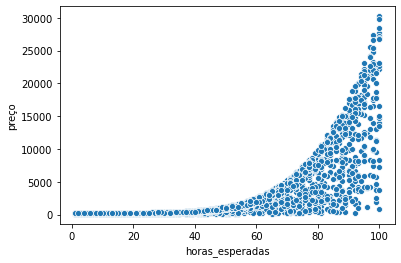

In [ ]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preço', data=df)

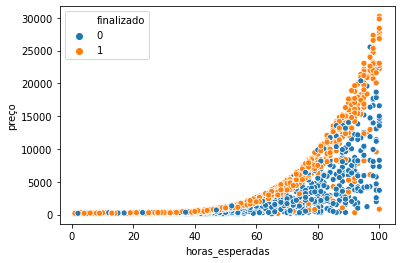

In [ ]:
#Verificação de cada classes utilizar o hue e o nome da coluna para verificar
sns.scatterplot(x='horas_esperadas', y='preço', hue='finalizado', data=df)

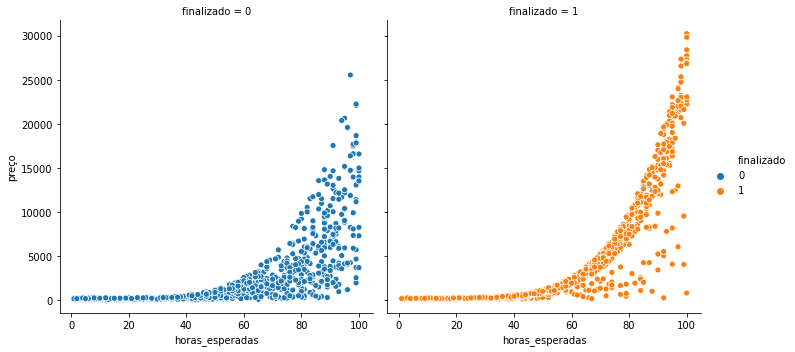

In [ ]:
#Separar grafico por classes, adiciona o col e a função muda
sns.relplot(x='horas_esperadas', y='preço', hue='finalizado',col='finalizado',data=df)

In [ ]:
x = df[['horas_esperadas', 'preço']]
y = df['finalizado']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 15

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state=SEED, 
                                                        test_size = 0.25,
                                                        stratify=y)
print(f"""Treinaremos com {len(treino_x)} elementos e testaremos com
{len(teste_x)}""")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
print(treino_x)
previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {round(taxa_de_acerto,2)}%')

##52,96%, se tiver mais sorte, ou mais moeda ganha mais

Treinaremos com 1617 elementos e testaremos com
540
      horas_esperadas  preço
993                87   6607
1987               72   4547
755                51    803
1392               58   2223
1876               84  11763
...               ...    ...
407                68   2052
270                 2    179
714                35    251
1894               23    291
383                 5    161

[1617 rows x 2 columns]
Taxa de acerto: 55.37%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
import numpy as np

previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) *100
print(f"A acuracia do algoritmo de baseline foi de {acuracia}")

A acuracia do algoritmo de baseline foi de 52.59259259259259


Qual o resumo da história?

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preço.min()
y_max = teste_x.preço.max()

print(x_min, x_max,y_min,y_max)

1 100 100 29820


In [ ]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
print(eixo_x)
print(eixo_y)

[ 1.    1.99  2.98  3.97  4.96  5.95  6.94  7.93  8.92  9.91 10.9  11.89
 12.88 13.87 14.86 15.85 16.84 17.83 18.82 19.81 20.8  21.79 22.78 23.77
 24.76 25.75 26.74 27.73 28.72 29.71 30.7  31.69 32.68 33.67 34.66 35.65
 36.64 37.63 38.62 39.61 40.6  41.59 42.58 43.57 44.56 45.55 46.54 47.53
 48.52 49.51 50.5  51.49 52.48 53.47 54.46 55.45 56.44 57.43 58.42 59.41
 60.4  61.39 62.38 63.37 64.36 65.35 66.34 67.33 68.32 69.31 70.3  71.29
 72.28 73.27 74.26 75.25 76.24 77.23 78.22 79.21 80.2  81.19 82.18 83.17
 84.16 85.15 86.14 87.13 88.12 89.11 90.1  91.09 92.08 93.07 94.06 95.05
 96.04 97.03 98.02 99.01]
[  100.    397.2   694.4   991.6  1288.8  1586.   1883.2  2180.4  2477.6
  2774.8  3072.   3369.2  3666.4  3963.6  4260.8  4558.   4855.2  5152.4
  5449.6  5746.8  6044.   6341.2  6638.4  6935.6  7232.8  7530.   7827.2
  8124.4  8421.6  8718.8  9016.   9313.2  9610.4  9907.6 10204.8 10502.
 10799.2 11096.4 11393.6 11690.8 11988.  12285.2 12582.4 12879.6 13176.8
 13474.  13771.2 14068.4 1

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.00000e+00, 1.00000e+02],
       [1.99000e+00, 1.00000e+02],
       [2.98000e+00, 1.00000e+02],
       ...,
       [9.70300e+01, 2.95228e+04],
       [9.80200e+01, 2.95228e+04],
       [9.90100e+01, 2.95228e+04]])

In [ ]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

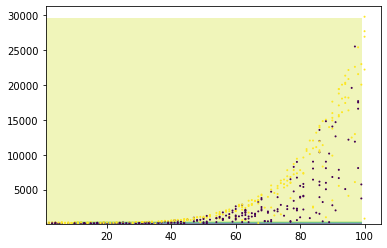

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y, s=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 15
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state=SEED, 
                                                        test_size = 0.25,
                                                        stratify=y)
print(f"""Treinaremos com {len(treino_x)} elementos e testaremos com
{len(teste_x)}""")

modelo = SVC()
modelo.fit(treino_x, treino_y)
print(treino_x)
previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {round(taxa_de_acerto,2)}%')

##52,96%, se tiver mais sorte, ou mais moeda ganha mais

Treinaremos com 1617 elementos e testaremos com
540
      horas_esperadas  preço
993                87   6607
1987               72   4547
755                51    803
1392               58   2223
1876               84  11763
...               ...    ...
407                68   2052
270                 2    179
714                35    251
1894               23    291
383                 5    161

[1617 rows x 2 columns]
Taxa de acerto: 55.19%


1 100 100 29820
[ 1.    1.99  2.98  3.97  4.96  5.95  6.94  7.93  8.92  9.91 10.9  11.89
 12.88 13.87 14.86 15.85 16.84 17.83 18.82 19.81 20.8  21.79 22.78 23.77
 24.76 25.75 26.74 27.73 28.72 29.71 30.7  31.69 32.68 33.67 34.66 35.65
 36.64 37.63 38.62 39.61 40.6  41.59 42.58 43.57 44.56 45.55 46.54 47.53
 48.52 49.51 50.5  51.49 52.48 53.47 54.46 55.45 56.44 57.43 58.42 59.41
 60.4  61.39 62.38 63.37 64.36 65.35 66.34 67.33 68.32 69.31 70.3  71.29
 72.28 73.27 74.26 75.25 76.24 77.23 78.22 79.21 80.2  81.19 82.18 83.17
 84.16 85.15 86.14 87.13 88.12 89.11 90.1  91.09 92.08 93.07 94.06 95.05
 96.04 97.03 98.02 99.01]
[  100.    397.2   694.4   991.6  1288.8  1586.   1883.2  2180.4  2477.6
  2774.8  3072.   3369.2  3666.4  3963.6  4260.8  4558.   4855.2  5152.4
  5449.6  5746.8  6044.   6341.2  6638.4  6935.6  7232.8  7530.   7827.2
  8124.4  8421.6  8718.8  9016.   9313.2  9610.4  9907.6 10204.8 10502.
 10799.2 11096.4 11393.6 11690.8 11988.  12285.2 12582.4 12879.6 13176.8
 13474.  1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


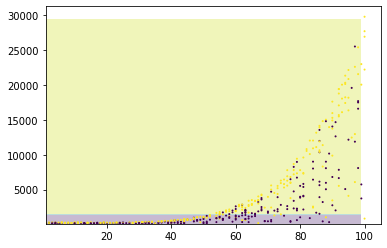

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preço.min()
y_max = teste_x.preço.max()

print(x_min, x_max,y_min,y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
print(eixo_x)
print(eixo_y)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

import matplotlib.pyplot as plt

plt.contourf(xx,yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y, s=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, random_state=SEED, 
                                                        test_size = 0.25,
                                                        stratify=y)
print(f"""Treinaremos com {len(treino_x)} elementos e testaremos com
{len(teste_x)}""")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
#modelo=SVC(gamma=auto)
modelo.fit(treino_x, treino_y)
print(treino_x)
previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {round(taxa_de_acerto,2)}%')

##52,96%, se tiver mais sorte, ou mais moeda ganha mais

Treinaremos com 1617 elementos e testaremos com
540
[[ 1.00371462 -0.51176969]
 [-1.2017427  -0.58099755]
 [-0.18653219 -0.51494346]
 ...
 [ 0.93370011  0.57881706]
 [-0.46659026 -0.56671559]
 [ 0.93370011  0.89282193]]
Taxa de acerto: 70.37%


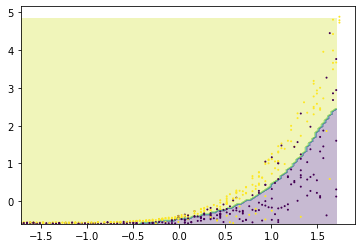

In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

import matplotlib.pyplot as plt

plt.contourf(xx,yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)